# 1. 生成数据表

安装：
+ pip install pandas

两种数据结构：
+ Series
+ DataFrame

生成数据表的方法：
+ 一般会通过读取文件获取数据表；
+ 通过dict、list或ndarray等构造DataFrame

首先是引入pandas和numpy，这是经常配合使用的两个包，pandas依赖于numpy，引入以后我们可以直接使用np/pd来表示这个两个模块

In [2]:
import pandas as pd
import numpy as np

## 1.1 读取数据

pandas提供了一些用于将表格型数据读取为DataFrame对象的函数。用的比较多的是read_table和read_csv，两者用法差不多，这里主要介绍read_csv。

用read_csv函数可以读取csv数据，默认数据之间是用逗号分隔开的。有时候数据集并不是这样的，咱们先看看比较完整的读数据参数设定。

In [14]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)


In [ ]:
data=pd.read_csv('data/bikes.csv')

读取的数据完全不对。需要对read_csv内部相应的参数进行相应的设置,read_csv有相应的参数需要我们设定一下，参数的具体见[官方文档](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html#pandas.read_table)。对于上面的数据：
+ 分隔符需要用到‘;’
+ 编码类型是‘latin1’,系统默认的是‘utf-8’
+ 有时间字段，需要对时间字段进行解析，并且进行排序

In [ ]:
fixed_df = pd.read_csv('data/bikes.csv', sep=';',  parse_dates=['Date'],encoding='latin1',header=0, dayfirst=True, index_col='Date')

In [ ]:
fixed_df 

In [ ]:
fixed_df.tail()#前面5行

In [ ]:
fixed_df.columns

也存在其他更加高效的磁盘存储格式（如json、xml、excel等），加载数据库中的数据，或者利用Web API操作网络资源等方式，详情点击[这里](http://pandas.pydata.org/pandas-docs/stable/api.html#input-output)。 

## 1.2 用pandas创建数据表

构造DataFrame的办法有很多，最常用的一种就是直接传入一个由等长列表或者Numpy数组组成的字典。

In [5]:
from pandas import DataFrame
import numpy as np

data = {'id':['1001','1002','1003','1004','1005','1006'], 
        'date':pd.date_range('20180102', periods=6),
        'city':['Beijing ', 'SH', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
        'age':[23,44,54,32,34,32],
        'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
        'price':[1200,np.nan,2133,5433,np.nan,4432]}
index = ['one','two','three','four','five','six']
d=pd.DataFrame(data,index=index)
d.to_excel('data/a.xlsx',index=False,sheet_name='abc')

In [44]:
a=np.arange(12).reshape(3,4)#list-like
# d=DataFrame(a,index=['one','two','three'],columns=['a','b','c','d'])
# d
d=pd.DataFrame(a,index=['one','two','three'],columns=['a','b','c','d'])

结果中DataFrame会自动加上行索引，而且列索引会进行有序排序。

指定列顺序,如果在列中找不到，就会产生NA值。行索引必须跟数据的长度匹配。

In [52]:
col = list(data.keys())
col.append('debt')
d=pd.DataFrame(data,columns=col,index=list('abcdef'))
d

,id,date,city,age,category,price,debt
a,1001,2018-01-02,Beijing,23,100-A,1200.0,NaN
b,1002,2018-01-03,SH,44,100-B,NaN,NaN
c,1003,2018-01-04,guangzhou,54,110-A,2133.0,NaN
d,1004,2018-01-05,Shenzhen,32,110-C,5433.0,NaN
e,1005,2018-01-06,shanghai,34,210-A,NaN,NaN
f,1006,2018-01-07,BEIJING,32,130-F,4432.0,NaN


In [45]:
d.values

array([[1001, Timestamp('2013-01-02 00:00:00'), 'Beijing ', 23, '100-A',
        1200.0, nan],
       [1002, Timestamp('2013-01-03 00:00:00'), 'SH', 44, '100-B', nan,
        nan],
       [1003, Timestamp('2013-01-04 00:00:00'), ' guangzhou ', 54,
        '110-A', 2133.0, nan],
       [1004, Timestamp('2013-01-05 00:00:00'), 'Shenzhen', 32, '110-C',
        5433.0, nan],
       [1005, Timestamp('2013-01-06 00:00:00'), 'shanghai', 34, '210-A',
        nan, nan],
       [1006, Timestamp('2013-01-07 00:00:00'), 'BEIJING ', 32, '130-F',
        4432.0, nan]], dtype=object)

In [6]:
pd.DataFrame(data,columns =['id','date','city','category','age','price','debt'],index=['one','two','three','four','five','six'])

,id,date,city,category,age,price,debt
one,1001,2018-01-02,Beijing,100-A,23,1200.0,NaN
two,1002,2018-01-03,SH,100-B,44,NaN,NaN
three,1003,2018-01-04,guangzhou,110-A,54,2133.0,NaN
four,1004,2018-01-05,Shenzhen,110-C,32,5433.0,NaN
five,1005,2018-01-06,shanghai,210-A,34,NaN,NaN
six,1006,2018-01-07,BEIJING,130-F,32,4432.0,NaN


In [54]:
s=pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)),columns=['a', 'b', 'c', 'd', 'e'],index=['one','two','three','four','five'])
s

,a,b,c,d,e
one,4,2,7,1,3
two,3,5,8,2,4
three,9,8,8,6,3
four,3,8,6,1,1
five,0,4,0,9,9


更多的构造DataFrame方法见[官方文档](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)。

## 1.3 另一种数据结构Series

Series类似于一维数组的对象，它由一组数据和一组与之相关的标签组成。

In [64]:
a=d['price']
a

one      1200.0
two         NaN
three    2133.0
four     5433.0
five        NaN
six      4432.0
Name: price, dtype: float64

In [73]:
li=np.array([1,2,3])
pd.Series(li,dtype='U')

0    1
1    2
2    3
dtype: object

In [52]:
type(d['price'])

pandas.core.series.Series

In [53]:
obj=pd.Series([1,2,3,4],index=list('abcd'))
obj.values

array([1, 2, 3, 4], dtype=int64)

In [ ]:
obj = pd.Series([5,4,-3,1,-4],dtype='int32')
print(obj)

In [ ]:
obj.values

In [ ]:
obj.index

我们希望Series每个值对应一个标签：

In [ ]:
obj = pd.Series([5,4,-3,1,-4],index=['a','b','c','e','d'])
print(obj)

也可以通过字典去构建Series：

In [55]:
sdata={'Shenzhen':10000,'Guangzhou':9500,'Shanghai':11000,'Beijing':11000}
pd.Series(sdata)

Beijing      11000
Guangzhou     9500
Shanghai     11000
Shenzhen     10000
dtype: int64

In [58]:
sdata={'Shenzhen':10000,'Guangzhou':9500,'Shanghai':11000,'Beijing':11000}
pdata = pd.Series(sdata)
print(pdata.shape)

(4,)


# 2. 信息查看和索引

## 2.1 查看属性和基础数据

可以通过以下的函数获取DataFrame的基本属性和基础数据，详情点击[这里](http://pandas.pydata.org/pandas-docs/stable/api.html#attributes-and-underlying-data)：

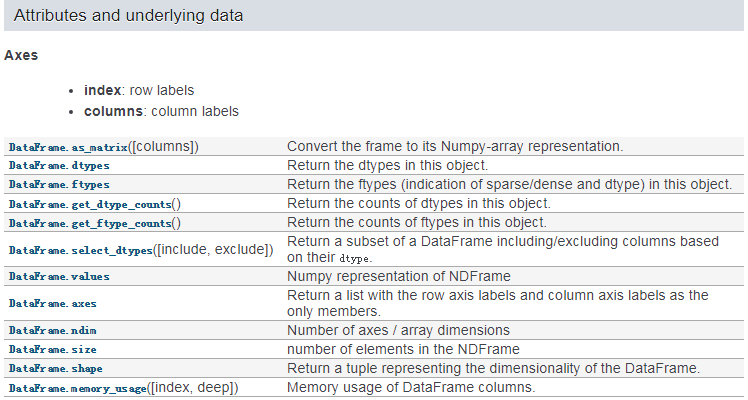

数据表的基本属性包括形状、数据类型、数据信息等

In [13]:
#构造一个DataFrame
df = pd.DataFrame({'id':[1001,1002,1003,1004,1005,1006], 
                   'date':pd.date_range('20130102', periods=6),
                   'city':['Beijing ', 'ShangHai', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
                   'age':[23,44,54,32,34,32],
                   'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
                   'price':[1200,np.nan,2133,5433,np.nan,4432]},index=[1,3,5,100,99,10])
#查看数据表的相关属性
print(df.index)#行索引的名字
print(df.columns)#
print(df.shape)#形状
print(df.info())#信息（形状、列信息、存储等）
print(df.dtypes)#每列的类型

Int64Index([1, 3, 5, 100, 99, 10], dtype='int64')
Index(['age', 'category', 'city', 'date', 'id', 'price'], dtype='object')
(6, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1 to 10
Data columns (total 6 columns):
age         6 non-null int64
category    6 non-null object
city        6 non-null object
date        6 non-null datetime64[ns]
id          6 non-null int64
price       4 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 336.0+ bytes
None
age                  int64
category            object
city                object
date        datetime64[ns]
id                   int64
price              float64
dtype: object


In [62]:
#构造一个DataFrame
df = pd.DataFrame({'id':[1001,1002,1003,1004,1005,1006], 
                   'date':pd.date_range('20130102', periods=6),
                   'city':['Beijing ', 'ShangHai', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
                   'age':[23,44,54,32,34,32],
                   'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
                   'price':[1200,np.nan,2133,5433,np.nan,4432]},columns =['id','date','city','category','age','price'])
#查看数据表的相关属性
print(df)
print(df.shape)#查看DataFrame的形状
# print(df.size)#查看表内所有数据数量
print(df.info())#表的信息,（维度、列名称、数据格式、所占空间等）
print(df.dtypes)#表的所有列的类型
print(df['id'].dtypes)#表中某一列的数据类型

     id       date         city category  age   price
0  1001 2013-01-02     Beijing     100-A   23  1200.0
1  1002 2013-01-03     ShangHai    100-B   44     NaN
2  1003 2013-01-04   guangzhou     110-A   54  2133.0
3  1004 2013-01-05     Shenzhen    110-C   32  5433.0
4  1005 2013-01-06     shanghai    210-A   34     NaN
5  1006 2013-01-07     BEIJING     130-F   32  4432.0
(6, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
id          6 non-null int64
date        6 non-null datetime64[ns]
city        6 non-null object
category    6 non-null object
age         6 non-null int64
price       4 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 368.0+ bytes
None
id                   int64
date        datetime64[ns]
city                object
category            object
age                  int64
price              float64
dtype: object
int64


In [15]:
df['id']=df['id'].astype('float32') 
df['id'].dtypes

dtype('float32')

In [65]:
#查看表的相关基础数据
print(df.values)#数据表内的值
print(df.index)#数据表的行索引
print(df.columns)#数据表的列名称

[[1001.0 Timestamp('2013-01-02 00:00:00') 'Beijing ' '100-A' 23 1200.0]
 [1002.0 Timestamp('2013-01-03 00:00:00') 'ShangHai' '100-B' 44 nan]
 [1003.0 Timestamp('2013-01-04 00:00:00') ' guangzhou ' '110-A' 54 2133.0]
 [1004.0 Timestamp('2013-01-05 00:00:00') 'Shenzhen' '110-C' 32 5433.0]
 [1005.0 Timestamp('2013-01-06 00:00:00') 'shanghai' '210-A' 34 nan]
 [1006.0 Timestamp('2013-01-07 00:00:00') 'BEIJING ' '130-F' 32 4432.0]]
RangeIndex(start=0, stop=6, step=1)
Index(['id', 'date', 'city', 'category', 'age', 'price'], dtype='object')


## 2.2 数据表的索引和选取

**选取单列或多个列**

(1) 直接根据列名来选取

In [26]:
df = pd.DataFrame({'id':[1001,1002,1003,1004,1005,1006], 
                   'date':pd.date_range('20130102', periods=6),
                   'city':['Beijing ', 'SH', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
                   'age':[23,44,54,32,34,32],
                   'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
                   'price':[1200,np.nan,2133,5433,np.nan,4432]},columns =['id','date','city','category','age','price'])
df

,id,date,city,category,age,price
0,1001,2013-01-02,Beijing,100-A,23,1200.0
1,1002,2013-01-03,SH,100-B,44,NaN
2,1003,2013-01-04,guangzhou,110-A,54,2133.0
3,1004,2013-01-05,Shenzhen,110-C,32,5433.0
4,1005,2013-01-06,shanghai,210-A,34,NaN
5,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [20]:
df[['price','id']]

pandas.core.frame.DataFrame

iloc()#针对索引，loc#针对索引名

In [22]:
df.iloc[1:3,3:5]

,category,age
two,100-B,44
three,110-A,54


In [36]:
df.iloc[:,1:5].loc[[1,3,5],['date','city']]

,date,city
1,2013-01-03,SH
3,2013-01-05,Shenzhen
5,2013-01-07,BEIJING


In [72]:
df = pd.DataFrame({'id':[1001,1002,1003,1004,1005,1006], 
                   'date':pd.date_range('20130102', periods=6),
                   'city':['Beijing ', 'SH', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
                   'age':[23,44,54,32,34,32],
                   'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
                   'price':[1200,np.nan,2133,5433,np.nan,4432]},columns =['id','date','city','category','age','price'],
                   index = ['one','two','three','four','five','six'])
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [ ]:
df[['id','city','age']]

**选取行的方法，相对来说比较丰富**

In [80]:
df.iloc[:2,[2,4,3]]

,city,age,category
one,Beijing,23,100-A
two,SH,44,100-B


In [84]:
df.loc[['three','one']].iloc[:,[2,0]]

,city,id
three,guangzhou,1003
one,Beijing,1001


（1）通过切片或者布尔型数组选取行

In [ ]:
df.iloc[:2]#通过切片

In [48]:
df.ix[:3,1:5]

d:\program files\python3.6\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,date,city,category,age
0,2013-01-02,Beijing,100-A,23
1,2013-01-03,SH,100-B,44
2,2013-01-04,guangzhou,110-A,54
3,2013-01-05,Shenzhen,110-C,32


In [43]:
df[df['age']<40][['id','price']]#布尔型索引

,id,price
0,1001,1200.0
3,1004,5433.0
4,1005,NaN
5,1006,4432.0


In [47]:
df.loc[df['age']<40].iloc[:,[0,-1]]

,id,price
0,1001,1200.0
3,1004,5433.0
4,1005,NaN
5,1006,4432.0


In [91]:
d=df[df['age']>30]
d['city']

two               SH
three     guangzhou 
four        Shenzhen
five        shanghai
six         BEIJING 
Name: city, dtype: object

In [90]:
df[df['age']>30][['id','city']]

,id,city
two,1002,SH
three,1003,guangzhou
four,1004,Shenzhen
five,1005,shanghai
six,1006,BEIJING


In [93]:
df[(df['age']>30) & (df['age']<40)]#通过布尔型数组选取行，是DataFrame在语法上更像ndarray

,id,date,city,category,age,price
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


(2) 通过obj.ix[val]，val可以使切片方法，可以是布尔判断，可以是行索引列。

In [ ]:
df.ix[df.age>40]

也可以通过ix同时选取行和列

（3）通过iloc或loc选取行

In [ ]:
df.loc[['one','two'],['id','city']]#loc接受的是索引

In [ ]:
df.iloc[:,:3]#iloc根据行号来索引

同时选取行和列

In [ ]:
df

In [ ]:
df.ix[['two','one','three'],[3,0,1]]

In [ ]:
df.loc[['two','one','three']].iloc[:,[3,0,1]]

(4) 通过obj.head()和obj.tail()查看行

In [94]:
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [98]:
df.head()#默认前5行

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN


In [ ]:
df.tail(2) #默认后5行数据

Pandas为我们提供的索引方法如下图，更详细的信息点击[这里](http://pandas.pydata.org/pandas-docs/stable/api.html#attributes-and-underlying-data)。

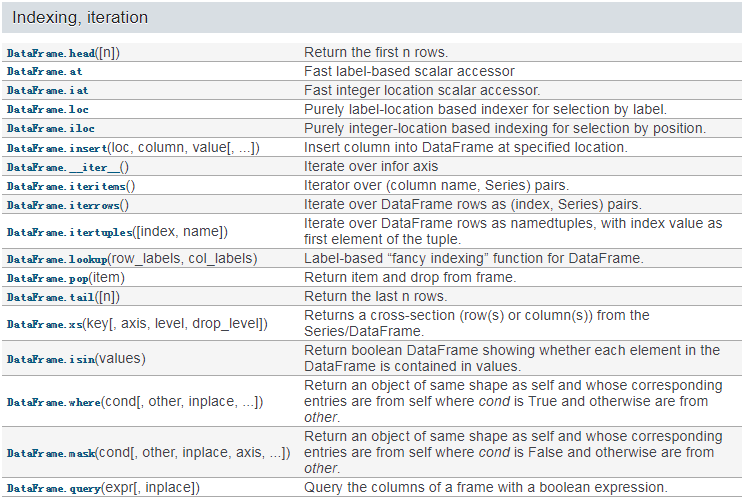

## 2.3 层次化索引

层次化索引是pandas的一项重要功能，它使数据表在一个轴上拥有多个（两个以上）索引级别。

**对于Series**

In [6]:
import pandas as pd
import numpy as np
data=pd.Series(np.random.randn(10),index=[['a','a','a','b','b','b','c','c','d','d'],[1,2,3,1,2,3,1,2,2,3]])
print(data)
print(data.index)

a  1    1.036737
   2    0.410893
   3   -0.284126
b  1    0.943345
   2   -0.011352
   3    0.472446
c  1    0.811278
   2   -0.304014
d  2   -0.973923
   3   -0.257702
dtype: float64
MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])


选取子集

In [30]:
data.loc['a',[1,3]]
# print(data['b'])
# print(data['b':'c'])
# print(data[['b','d']])
# print(data[:,2])
data.unstack(0)#重塑

,a,b,c,d
1,1.036737,0.943345,0.811278,NaN
2,0.410893,-0.011352,-0.304014,-0.973923
3,-0.284126,0.472446,NaN,-0.257702


层次化索引在数据重塑和基于分组的操作中扮演重要的角色。

**对于DataFrame**

In [31]:
frame=pd.DataFrame(np.arange(12).reshape(4,3),index=[['a','a','b','b'],[1,2,1,2]],
                   columns=[['Shenzhen','Shenzhen','Guangzhou'],['Red','Green','Red']])
frame

Shenzhen       Guangzhou
         Red Green       Red
a 1        0     1         2
  2        3     4         5
b 1        6     7         8
  2        9    10        11

In [40]:
frame.loc['a',:].loc[2]

Shenzhen   Red      3
           Green    4
Guangzhou  Red      5
Name: 2, dtype: int32

In [ ]:
df

In [ ]:
df.iloc[:3,1:3]

## 2.4 其他

查看是否有空值,用isna()和notna()

In [79]:
from pandas import DataFrame
import numpy as np

data = {'id':['1001','1002','1003','1004','1005','1006'], 
        'date':pd.date_range('20180102', periods=6),
        'city':['Beijing ', 'SH', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
        'age':[23,44,54,32,34,32],
        'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
        'price':[1200,np.nan,2133,5433,np.nan,4432]}
index = ['one','two','three','four','five','six']
df=pd.DataFrame(data,index=index)
df

,age,category,city,date,id,price
one,23,100-A,Beijing,2018-01-02,1001,1200.0
two,44,100-B,SH,2018-01-03,1002,NaN
three,54,110-A,guangzhou,2018-01-04,1003,2133.0
four,32,110-C,Shenzhen,2018-01-05,1004,5433.0
five,34,210-A,shanghai,2018-01-06,1005,NaN
six,32,130-F,BEIJING,2018-01-07,1006,4432.0


In [52]:
print(df['price'].isna())#判断是否有空值,若果某个值为空，对应的位置返回True
df['price'].notna()#判断是否有空值,若果某个值为空，对应的位置返回False

one      False
two       True
three    False
four     False
five      True
six      False
Name: price, dtype: bool


one       True
two      False
three     True
four      True
five     False
six       True
Name: price, dtype: bool

查看某列的唯一值，用unique()

In [67]:
df

,age,category,city,date,id,price
one,23,100-A,Beijing,2018-01-02,1001,1200.0
two,44,100-B,SH,2018-01-03,1002,NaN
three,54,110-A,guangzhou,2018-01-04,1003,2133.0
four,32,110-C,Shenzhen,2018-01-05,1004,5433.0
five,34,210-A,shanghai,2018-01-06,1005,NaN
six,32,130-F,BEIJING,2018-01-07,1006,4432.0


In [81]:
city=list(df['city'])
city[city.index('SH')]='Shanghai'
df['city']=city
df['city']=df['city'].str.title()
df['city'].unique()

array(['Beijing ', 'Shanghai', ' Guangzhou ', 'Shenzhen'], dtype=object)

In [57]:
df['age'].unique()

array([23, 44, 54, 32, 34], dtype=int64)

判断是否在数据表中，用isin()

In [108]:
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [122]:
df['city']=df['city'].str.title().str.strip()
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,Sh,100-B,44,NaN
three,1003,2013-01-04,Guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,Shanghai,210-A,34,NaN
six,1006,2013-01-07,Beijing,130-F,32,4432.0


In [119]:
df['city']

one        Beijing
two             Sh
three    Guangzhou
four      Shenzhen
five      Shanghai
six        Beijing
Name: city, dtype: object

In [85]:
help(datetime)

Help on class datetime in module datetime:

class datetime(date)
 |  datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
 |  
 |  The year, month and day arguments are required. tzinfo may be None, or an
 |  instance of a tzinfo subclass. The remaining arguments may be ints.
 |  
 |  Method resolution order:
 |      datetime
 |      date
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __new__(*args, **kwa

In [107]:
from datetime import datetime
datetime(2018,8,19,23,59,59).weekday()


6

In [105]:
from datetime import datetime
lis = [32,'100-B','Beijing',datetime(2018,1,5),1006,1200.0]
# lis=list(df.iloc[0])
print(lis)
df['city']=df['city'].str.strip()
df.isin(lis)

[32, '100-B', 'Beijing', datetime.datetime(2018, 1, 5, 0, 0), 1006, 1200.0]


,age,category,city,date,id,price
one,False,False,True,False,False,True
two,False,True,False,False,False,False
three,False,False,False,False,False,False
four,True,False,False,True,False,False
five,False,False,False,False,False,False
six,True,False,True,False,False,False


In [106]:
df.isin(['Beijing',1200.0])

,age,category,city,date,id,price
one,False,False,True,False,False,True
two,False,False,False,False,False,False
three,False,False,False,False,False,False
four,False,False,False,False,False,False
five,False,False,False,False,False,False
six,False,False,True,False,False,False


针对选取的单列或Series中各值出现的频率，用value_counts函数。

In [123]:
df = pd.DataFrame({'id':[1001,1002,1003,1004,1005,1006], 
                   'date':pd.date_range('20130102', periods=6),
                   'city':['Beijing ', 'Shanghai', 'guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
                   'age':[23,44,54,32,34,32],
                   'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
                   'price':[1200,np.nan,2133,5433,np.nan,4432]},columns =['id','date','city','category','age','price'],
                   index = ['one','two','three','four','five','six'])
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,Shanghai,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [83]:
df['city'].value_counts()#用value_counts()进行频数统计

Shanghai       2
Beijing        2
Shenzhen       1
 Guangzhou     1
Name: city, dtype: int64

In [ ]:
df['city'].str.upper().value_counts()#用upper进行字符串的大写，用value_counts()进行频数统计

# 3. 数据可视化

安装：
+ pip install matplotlib

## 3.1 matplotlib.pyplot

matplotlib API函数都位于matplotlib.pyplot模块中，详情见[官方文档](https://matplotlib.org/api/pyplot_summary.html)。

In [109]:
import matplotlib.pyplot as plt #载入matplotlib.pyplot模块
import pandas as pd
import numpy as np

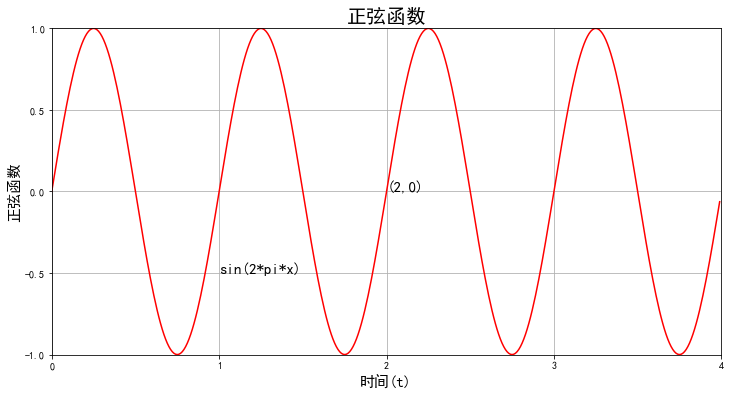

In [147]:
plt.rcParams['font.sans-serif'] = ['Simhei']#中文显示
plt.rcParams['axes.unicode_minus'] = False #显示负号

x=np.arange(0,4,0.01)
y = np.sin(2*np.pi*x)

plt.figure(figsize=(12,6))

plt.plot(x,y,color='r')#画线
plt.title('正弦函数',fontsize=20,loc='center')#标题
plt.xlim(0,4)#限制x轴显示区间
plt.ylim(-1,1)#限制y轴的显示区间
# plt.axis('off')
plt.grid()#显示网格
plt.xticks(range(0,5,1))#修改x轴刻度
plt.yticks(np.arange(-1,1.5,0.5))##修改y轴刻度
plt.xlabel('时间(t)',fontsize=15)#x轴的标签
plt.ylabel('正弦函数',fontsize=15)#x轴的标签
plt.text(1,-0.5,'sin(2*pi*x)',fontsize=15)
plt.text(2,0,'(2,0)',fontsize=15)
plt.show()#显示
plt.savefig('img/sin.png',dpi=200,bbox_inches='tight')#保存

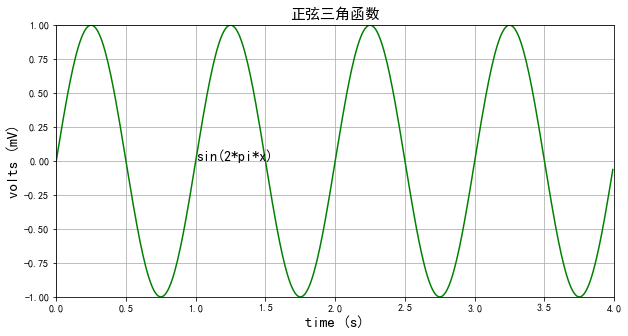

In [143]:
t = np.arange(0.0, 4.0, 0.01)
s = np.sin(2*np.pi*t)
plt.rcParams['font.sans-serif'] = ['Simhei']#中文显示
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(10,5))#新建figure，设置图片的大小

plt.plot(t,s,'g')#画出图形
plt.title('正弦三角函数', fontsize=15)#设置标题
plt.text(1, 0, 'sin(2*pi*x)', fontsize=14)#设置文本
# plt.text(0.4, 0.6, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$',fontsize=18)#设置文本
plt.xlabel('time (s)',fontsize = 15)#x轴的标签
plt.ylabel('volts (mV)',fontsize=15)#y轴的标签
plt.grid(True)#设置网格
plt.xlim(0,4)#设置x轴方向的刻度范围
plt.ylim(-1,1)#设置y轴方向的刻度范围
plt.savefig('图片/MathPlot2.jpg',dpi=500,bbox_inches='tight')#保存图片

<BarContainer object of 5 artists>

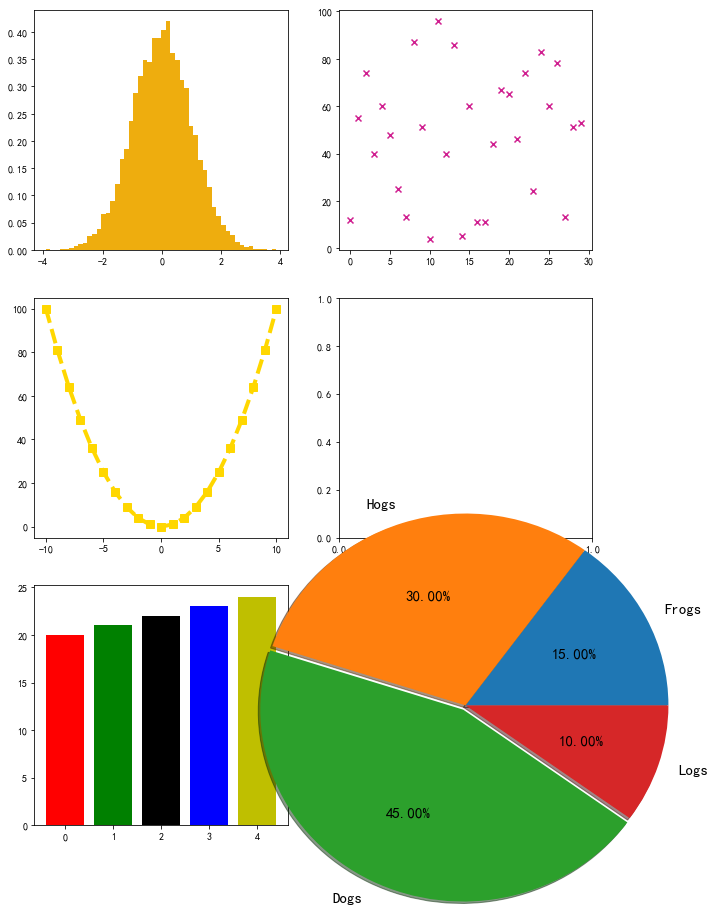

In [204]:
import matplotlib.pyplot as plt #载入matplotlib.pyplot模块
import pandas as pd
import numpy as np

plt.rcParams['font.sans-serif'] = ['Simhei']#中文显示
plt.rcParams['axes.unicode_minus'] = False 

fig = plt.figure(figsize=(10,15))

ax=fig.subplots(3,2)
s = np.random.randn(10000)
ax[0][0].hist(s,bins=50,color='#EEAD0E',density=True)#条形图

x=np.arange(0,30)
y=np.random.randint(1,100,size=30)
ax[0][1].scatter(x,y,marker='x',color='#D02090')#散点图

x=np.arange(-10,11,1)
y=x*x
ax[1][0].plot(x,y,color='gold',marker='s',markersize=8,linestyle='--',linewidth=4)#线状图

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0, 0.05, 0)
patches, texts, autotexts=ax[2][1].pie(sizes,labels=labels,autopct='%0.2f%%',explode=explode,shadow=True,radius=2)#饼状图
for t in texts:
    t.set_size(15)
for tt in autotexts:
    tt.set_size(15)


y=range(20,25)
x=range(0,5)
color=['r','g','k','b','y']
ax[2][0].bar(x,y,color=color)

([<matplotlib.axis.XTick at 0x1a7095f8>,
 <a list of 5 Text xticklabel objects>)

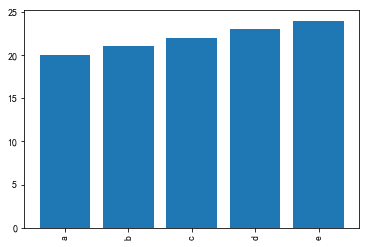

In [200]:
y=range(20,25)
x=range(0,5)
xtick=list('abcde')
plt.bar(x,y)
plt.xticks(x,xtick,rotation=90)

## 3.2 Pandas中的绘图函数

matplotlib实际上是一个比较低级的工具，要组装一张图，需要各种基础组件，如数据展示、图例、标题、刻度标签以及其他注释型信息。

在pandas中，有专门针对绘图的函数如下，详情见[官方网站](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)。

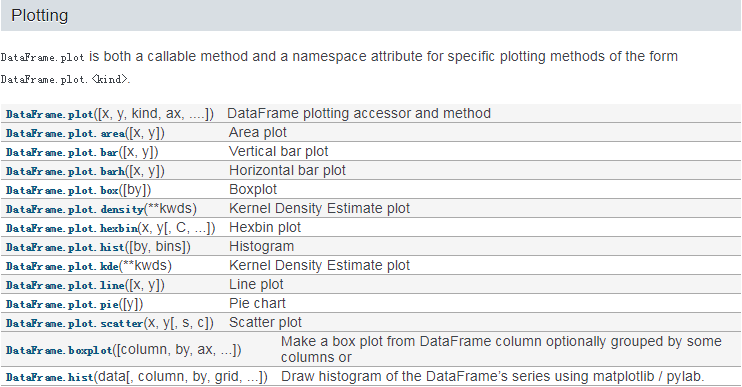

### 3.2.1 线状图

In [206]:
s=np.random.randn(10,4)
print(s)
s1=s.cumsum(0)
print(s1)

[[-2.94965098e-01  2.52379802e-01 -3.15973056e-02  2.14969157e-01]
 [ 2.18447567e-03 -4.33187817e-01 -1.38536611e+00 -1.39568848e+00]
 [ 2.46722305e-01  1.11711815e+00  7.42887270e-01 -4.99186389e-01]
 [-1.31007987e+00 -6.41335487e-01  3.26721843e-01 -1.59765044e+00]
 [ 2.80173427e-01 -2.07576407e-01 -1.14040357e-01 -9.41242203e-01]
 [ 7.91559168e-01 -2.71572008e-01 -6.25739113e-01  6.32439590e-01]
 [-8.31120858e-01  2.19458659e-01  7.36887424e-01 -6.61600274e-01]
 [ 4.07539613e-01 -8.10174841e-01 -9.95637638e-01 -1.64131434e-01]
 [-1.42019368e+00 -4.63649452e-01  6.80285650e-01  5.36161449e-01]
 [-1.31104077e+00 -2.34999198e+00  3.85703574e-01  7.15154542e-01]]
[[-0.2949651   0.2523798  -0.03159731  0.21496916]
 [-0.29278062 -0.18080801 -1.41696341 -1.18071932]
 [-0.04605832  0.93631013 -0.67407614 -1.67990571]
 [-1.35613819  0.29497464 -0.3473543  -3.27755615]
 [-1.07596476  0.08739824 -0.46139466 -4.21879836]
 [-0.28440559 -0.18417377 -1.08713377 -3.58635877]
 [-1.11552645  0.035284

           A         B         C         D
0  -0.804458  0.320932 -0.025483  0.644324
10 -1.105255  0.710406 -0.132920  0.164341
20 -0.510219  0.245739  0.534361 -0.641775
30 -1.706289 -0.160222  0.351984 -0.538582
40 -1.844711  0.545471  1.623779 -1.525329
50 -2.179547  0.445989  2.030971 -0.605942
60 -1.867429  1.979150  1.480797 -0.989089
70 -2.690370  3.579234  1.411516 -0.905880
80 -3.017294  3.533436  1.107056  1.017130
90 -3.095953  2.951371 -0.510926  1.884391


Text(0.5,0,'x轴')

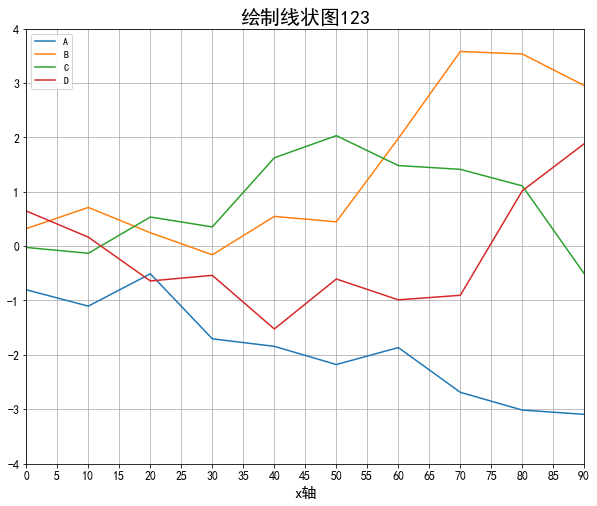

In [225]:
np.random.seed(1000)
#plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题,或者转换负号为字符串
df = DataFrame(np.random.randn(10,4).cumsum(0),columns=list('ABCD'),index = np.arange(0,100,10))
print(df)
# df.plot(kind='line',grid=True,style=['r-','g-.','b--','k:'],figsize=(8,5))#绘制线状图
# plt.xlim(0,100)
df.plot(kind='line',figsize=(10,8),grid=True,xlim=(0,90),ylim=(-4,4),title='绘制线状图',xticks=range(0,95,5),fontsize=12,mark_right=False)
plt.title('绘制线状图123',fontsize=20)
plt.xlabel('x轴',fontsize=15)

### 3.2.2 柱状图

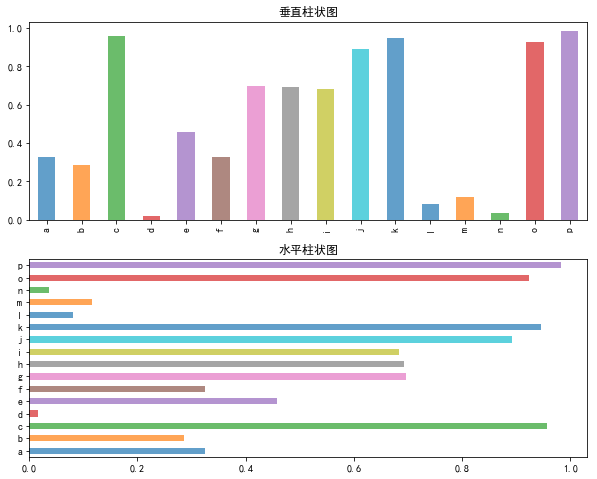

In [232]:
#plt.rcParams['font.sans-serif'] = ['KaiTi']
#plt.rcParams['font.serif'] = ['KaiTi']
fig2=plt.figure(figsize=(10,8))
ax= fig2.subplots(2, 1)
data = pd.Series(np.random.rand(16),index = list('abcdefghijklmnop'))
data.plot(kind='bar',ax=ax[0],alpha=0.7,title='垂直柱状图')
# data.plot(kind='bar',ax=ax[0],color='r',alpha=0.5,title='柱状图')
data.plot(kind='barh',ax=ax[1],alpha=0.7,title='水平柱状图')

              A         B         C         D
one    0.212810  0.976354  0.927141  0.091642
two    0.783431  0.074039  0.347709  0.970148
three  0.453523  0.373952  0.316896  0.905900
four   0.804572  0.834775  0.648070  0.238994
five   0.226316  0.476756  0.429435  0.158189
six    0.195877  0.028943  0.600404  0.414417


[Text(0,0,'one'),
 Text(0,0,'two'),
 Text(0,0,'three'),
 Text(0,0,'four'),
 Text(0,0,'five'),
 Text(0,0,'six')]

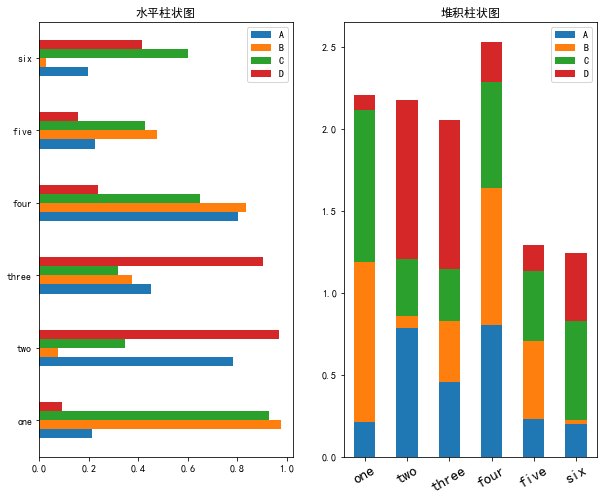

In [241]:
fig4 = plt.figure(figsize=(10,8))
ax=fig4.subplots(1,2)
df = DataFrame(np.random.rand(6,4),index=['one','two','three','four','five','six'],columns = list('ABCD'))
print(df)
df.plot(kind='barh',ax=ax[0],title='水平柱状图')
df.plot(kind='bar',ax=ax[1],stacked=True,title='堆积柱状图')#绘制堆积柱状图
ax[1].set_xticklabels(labels=list(df.index),rotation=30,fontsize=15)
# ax[1].set_xticklabels(labels=list(df.index),rotation=90,fontsize=20)#设置x轴的刻度，改变旋转度，字体尺寸

### 3.2.3 直方图和密度图

安装Scipy：
+ pip install scipy

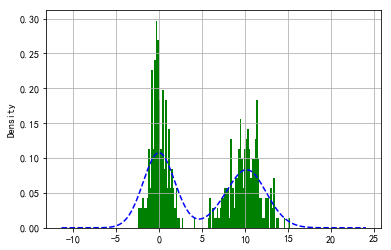

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
values.hist(bins=100,color='g',density=True)
values.plot(kind='kde',style='b--')
plt.grid(True)

# 练习

**作业：**

1.将'311-service-requests.csv'数据集加载到DataFrame中，查看数据集；

2.取出'Complaint Type'对应的列；

3.将'Complaint Type'列中的数值频数计算，并进行排序；(提示：求频数，用value_counts()函数)

4.针对排序好的数据，取出Top5；

5.针对Top5画出柱状图，并将图形保存。

d:\program files\python3.6\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
Name: Complaint Type, dtype: int64
[14200, 7471, 7117, 5797, 5373]


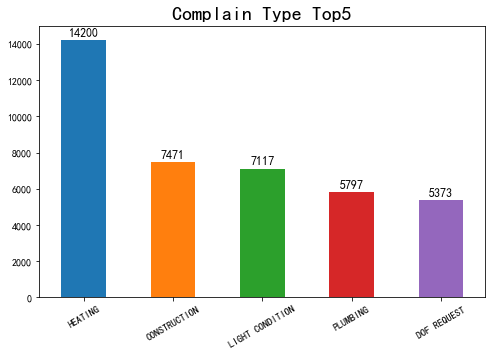

In [202]:
import matplotlib.pyplot as plt #载入matplotlib.pyplot模块
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(8,5))
complaints = pd.read_csv('data/311-service-requests.csv')
complaints['Complaint Type'].value_counts().head().plot(kind='bar')
data=complaints['Complaint Type'].value_counts().head()
print(data)
plt.xticks(range(len(data.index)),['HEATING','CONSTRUCTION','LIGHT CONDITION','PLUMBING','DOF REQUEST'],rotation=30,fontsize=10)
x=range(len(data.index))
y=list(data.values)
print(y)
#添加文本数字信息 
for a,b in zip(x,y):
    plt.text(a, b+100,str(b), ha='center', va= 'bottom',fontsize=12)
plt.title('Complain Type Top5',fontsize=20)
plt.ylim(0,15000)
plt.savefig('图片/Image.png',dpi=300,bbox_inches='tight')
plt.show()